In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import seaborn as sns
import matplotlib.pyplot as plt
import math

# A) expected value of the function

In [2]:
#A
sample=1000
dimension=10
data=[]
for i in range(sample):
    newdata= np.random.randint(1,10, size=(1,dimension))
    data.append(newdata)
mean=np.mean(data,axis=0)
data

[array([[4, 7, 9, 6, 4, 2, 6, 6, 8, 7]]),
 array([[5, 7, 4, 3, 6, 4, 3, 2, 9, 1]]),
 array([[8, 8, 4, 5, 2, 3, 9, 1, 5, 8]]),
 array([[4, 9, 4, 4, 8, 5, 4, 1, 2, 9]]),
 array([[1, 1, 8, 8, 9, 3, 3, 4, 5, 9]]),
 array([[5, 9, 3, 9, 3, 4, 7, 5, 6, 4]]),
 array([[5, 7, 9, 8, 8, 2, 6, 7, 5, 8]]),
 array([[2, 9, 1, 7, 7, 2, 6, 3, 7, 1]]),
 array([[7, 4, 6, 6, 7, 5, 6, 4, 3, 7]]),
 array([[8, 4, 4, 1, 8, 4, 7, 4, 5, 6]]),
 array([[9, 9, 1, 7, 3, 1, 5, 7, 1, 3]]),
 array([[6, 5, 9, 1, 6, 1, 2, 9, 1, 1]]),
 array([[7, 3, 7, 8, 2, 3, 1, 4, 8, 5]]),
 array([[8, 4, 6, 1, 2, 4, 3, 4, 9, 2]]),
 array([[5, 2, 6, 9, 8, 9, 7, 4, 7, 6]]),
 array([[1, 8, 6, 6, 9, 6, 8, 2, 5, 8]]),
 array([[6, 6, 5, 2, 6, 8, 2, 8, 1, 1]]),
 array([[9, 7, 5, 1, 4, 8, 7, 4, 4, 1]]),
 array([[2, 9, 7, 1, 8, 2, 4, 6, 4, 2]]),
 array([[1, 1, 7, 2, 4, 6, 1, 8, 2, 2]]),
 array([[2, 6, 4, 6, 9, 1, 9, 2, 4, 5]]),
 array([[8, 9, 2, 2, 4, 8, 6, 7, 8, 2]]),
 array([[8, 3, 7, 7, 8, 5, 6, 6, 1, 1]]),
 array([[6, 1, 8, 4, 9, 4, 5, 2, 9

# B) Sample from bivariate Normal

In [11]:
#calculation of covariance of d matrix
d = np.array(data)[:,0]
covD = np.cov(d.T)
covD

array([[ 6.35183083e+00, -2.93627628e-01, -1.40140140e-05,
         3.87287287e-03, -9.37847848e-02, -7.44644645e-02,
         1.24035035e-01, -1.72069069e-01,  3.95935936e-01,
         1.01998999e-01],
       [-2.93627628e-01,  6.34951351e+00, -6.16176176e-02,
         3.97123123e-01,  6.95555556e-02, -9.71571572e-02,
         2.73667668e-01,  1.56318318e-01,  7.82382382e-02,
        -9.12532533e-02],
       [-1.40140140e-05, -6.16176176e-02,  6.60392793e+00,
         3.83629630e-01, -1.32926927e-01, -2.09469469e-01,
         1.62436436e-01,  1.49551552e-01,  4.34034034e-02,
         8.36816817e-02],
       [ 3.87287287e-03,  3.97123123e-01,  3.83629630e-01,
         6.79495395e+00, -3.57358358e-01,  1.01811812e-01,
        -1.55945946e-02, -3.77044044e-01,  1.35075075e-01,
         2.00867868e-01],
       [-9.37847848e-02,  6.95555556e-02, -1.32926927e-01,
        -3.57358358e-01,  6.64888789e+00,  5.73673674e-02,
        -8.97087087e-02, -4.56326326e-02,  4.93893894e-02,
        -1.

In [4]:
#Sample from bivariate Normal
normalData=automatic_samples=np.random.multivariate_normal(mean[0],covD,sample)
ExpectedValue=np.mean(normalData,axis=0)
ExpectedValue

array([4.92205483, 4.9161183 , 5.06465168, 5.08237187, 5.11535275,
       4.94950922, 5.09093735, 5.18090936, 5.09796279, 4.82597296])

In [5]:
def normpdf(x, mean, sd):
    x = x.reshape(1,x.shape[0])
    covDet = np.linalg.det(sd)
    covInv = np.linalg.inv(sd)
    num= math.exp(-0.5 * np.diag((x-mean) @ covInv @ (x-mean).T))
    denom=np.sqrt(2 * np.pi * covDet)
    return num/denom

In [6]:
#Gibbs sampling in our data
gibssSample = np.zeros((sample,dimension))

for i in range(sample):
    currentD = data[i][0]
    pAll = normpdf(currentD, mean[0], covD)
    a=[]
    for j in range(dimension):
        index = np.arange(dimension)
        newCov = covD[:, index != j]
        pRest = normpdf(currentD[index != j], mean[:, index != j], newCov[index != j, :])
        ConditionalP = pRest / pAll
        a.append(np.float_(ConditionalP))
        
    gibssSample[i] = a
type(gibssSample)

numpy.ndarray

In [7]:
gibssSample

array([[ 2.79405568,  3.39079884,  7.52730312, ...,  2.66321093,
         4.36962414,  3.38132974],
       [ 2.51557049,  3.71325366,  2.67429615, ...,  5.23722853,
         7.95786758,  8.30339842],
       [ 4.77426409,  5.73389042,  2.81038354, ...,  9.9989485 ,
         2.70608862,  4.90807999],
       ...,
       [11.49871044,  5.52267221,  9.16306529, ...,  3.52594487,
         3.69326929,  4.97529364],
       [ 2.55462788,  9.1256681 ,  7.56948838, ...,  2.69395827,
         8.23775597, 10.60475917],
       [ 5.28433914,  8.45801719,  5.08557363, ...,  7.21298043,
         2.60686177,  4.79195406]])

# evaluation measurenment

In [8]:
sample_mean = np.mean(gibssSample, axis=0)
sample_mean

array([4.62995701, 4.62778405, 4.71045047, 4.74009028, 4.69030333,
       4.70179584, 4.78778838, 4.68417233, 4.73515798, 4.68894197])

In [9]:
squerError= np.linalg.norm(ExpectedValue - sample_mean)
squerError

1.0687159053597843

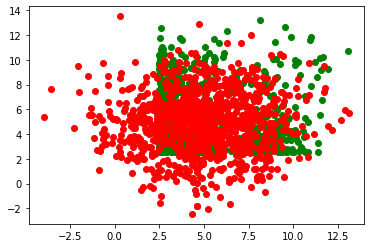

In [10]:
plt.scatter(gibssSample[:,0],gibssSample[:,1], color='green')
plt.scatter(normalData[:,0],normalData[:,1], color="red")